# Differential Calculus (i.e. Derivatives)

## 2 popular methods to computationally calculate the derivative of a function $f(x)$

- **Numerical differentiation** relies on the definition of the derivative: $\large f'(x)=lim_{h\to 0}=\frac{f(x+h)-f(x)}{h}$ where you use a very small h and evaluate the function in two places $f(x+h)$ and $f(x)$ to get an approximation to the derivative. This way of calculating a derivative is suitable mostly if you do not know your function and can only sample it. Also it requires a lot of computation for a high-dimensional function. 

- **Symbolic/Analytical differentiation** uses derivative rules (product rule, power rule, chain rule, etc) to obtain the derivative

    - $f(x)=3x^2 \rightarrow f'(x)=6x$ (power rule)

Let's calculate computationally the derivative of the function $f(x)=3x^2+1$, which we know it is $f'(x)=6x$

### Symbolic/Analytical solutions to derivatives 

For symbolic differentiation we use the package `sympy`

We define $f(x)=3x^2 + 1$ and then calculate its derivative $f'(x)=6x$ (df in the code)

In [3]:
import sympy as sp
x=sp.Symbol('x')
f=3*x**2+1
df = sp.diff(f,x) #Derivative of f with respect to x. diff Stands for differentiate
df

6*x

Let's evaluate f'(x) at x=2

In [4]:
df.evalf(subs={x:2})

12.0000000000000

So the rate of change $f'(x)$ of the function $f(x)=3x^2 + 1$ when $x=2$ is $12$. This means that precisely at $x=2$, a unit of increase in $x$, increases $f(x)$ by 12 units. 

### Numerical solutions to derivatives 

For numerical differentiation we can use the package `scipy`.

In [5]:
from scipy.misc import derivative

def f(x):
    return 3*x**2+1

derivative(f,2) #Evaluate the derivative of f at x=2

12.0

The derivative of a function $f(x)$ at a point $x = a$ is equal to the rate of change in $f(x)$ at that
point, or equivalently the slope of the line tangent to the function at the point $x = a$.
The derivative of a function $f(x)$ at the point $x = a$ is defined to be equal to
$f'(a)=lim_{\Delta x \to 0}=\frac{f(a+\Delta x)-f(a)}{\Delta x}$

Numerical differentiation uses the formula $f'(x)=\frac{f(x+\Delta x)}{\Delta x}$ to approximate the derivative of $f(x)$ at a given value $x$

In [6]:
x = 2 #The value where we want to estimate the derivative of f(x)
delta = 0.01 #∆x
(f(2+delta)-f(2))/delta #f'(2)

12.029999999999674

Notice that as you make delta (∆x) smaller, the approximation of the derivative gets better and better.

In [7]:
x = 2 #The value where we want to estimate the derivative of f(x)
delta = 0.000000001 #∆x
(f(2+delta)-f(2))/delta #f'(2)

12.000000992884452

So the derivative of $f(x)$ at $x=2$ is 12.

Let's plot $f(x)$ and its derivative $f'(x)$ (aka $\frac{d}{dx}f$)

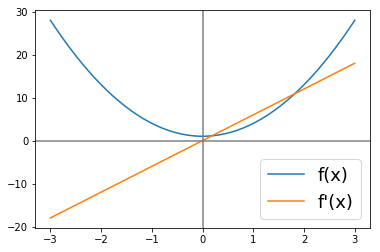

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def df(x): #Derivative of f at x
    return derivative(f,x)

x=np.linspace(-3, 3)
plt.plot(x,f(x),label='f(x)') #Plot f(x)

plt.plot(x,df(x),label='f\'(x)') #Plot f'(x)
plt.axvline(x=0,color='grey') #y axis
plt.axhline(y=0,color='grey') #x axis

plt.legend(loc='lower right',fontsize=18)

The rate at which $f(x)$ is growing at $x=2$ is 12 ( one unit of increasing in $x$ leads to 12 units of increase in $y$.

## Using limits to calculate the derivative

Let's use `sympy` to confirm that the derivative of the function $f(x) = 3x^2 + 1$ at the point $x = 2$ is $12$

In [25]:
import sympy as sp

f=sp.Function('f')
a,h,x=sp.symbols('a,h,x')

def f(x):
    return 3*x**2+1

sp.limit((f(a+h)-f(a))/h,h,0)
 

6*a

## Finding Derivatives using the online tool WolframAlpha

Check out this online computational engine to compute derivatives a function and many other mathematical tools:

What is the the derivative ($f'(x)$) of $f(x)=x^2$ (i.e. $\frac{d}{dx} x^2)$ [Click here to find out](https://www.wolframalpha.com/input/?i=derivative+of+x%5E2)

## Estimating derivatives from empirical data

There are fairly sophisticated methods to estimate the derivative of an empirical function. Empirical functions are functions for which we don't have an analytical formula $f(x)$, we only have samples of the value of the function.

Let's say Researchers measured the average blood alcohol concentration of eight men starting one hour after consumption of 30 mL of ethanol (corresponding to two alcoholic drinks):

| t(hours) | c(t) (mg/mL) |
|----------|----------|
| 1      | 0.33      |
| 1.5      | 0.24      |
| 2     | 0.18     |
| 2.5      | 0.12      |
| 3     | 0.07     |

First, let's plot the empirical function:

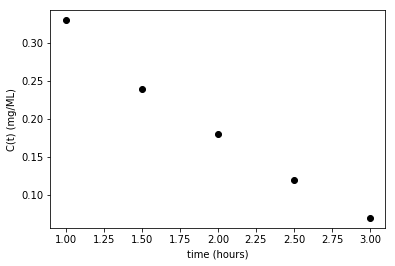

In [26]:
t=[1.,1.5,2,2.5,3.] 
C=[0.33,0.24,0.18,0.12,0.07] 

import matplotlib.pyplot as plt 
plt.xlabel('time (hours)')
plt.ylabel('C(t) (mg/ML)')
plt.show(plt.plot(t,C,'ko')) 

Calculate the average rate of change of the blood alcohol concentration over the time interval `[1,2]`:

In [27]:
 (C[2]-C[0])/(t[2]-t[0]) 

-0.15000000000000002

The negative sign indicates that the blood alcohol concentration is decreasing over the time interval [1,2] (as it's obvious from the plot above)

## Second derivatives

The $2^{nd}$ derivative of a function is the derivative of the derivative of a function. Let's say $f(x) = x^2 − 8x + 9$.

In [28]:
f=x**2-8*x+9

The derivative of $f(x) = x^2 − 8x + 9$ is $f'(x)=2x-8$

The $2^{nd}$ derivative of $f(x)$ (aka the derivative of $f'(x)$) is $f''(x)=2$. Computationally, we can carry out that computation by embedding the output of the 1st derivative in the input to calculate the 2nd derivative (i.e. recursive call):

In [29]:
sp.diff(sp.diff(f,x),x)

2

## Finding the solutions/roots of functions

The derivative forms the basis of two fundamental approaches in theoretical analysis of complex systems - approximations to functions and Newton's method for solving roots of equations.

For example, often we seek to optimize a function by finding its local or global minimum or maximum. Those points will be located at the positions where $f(x)$ doesn't increase nor decrease. Those positions will correspond to points were the derivative $f'(x)$ (i.e. the rate of change of the function) is equal to zero. **So we can basically find out the maxima and minima of a function $f(x)$ by finding the roots/solutions of $f'(x)$**.

The `sympy` library in Scientific Python has functions for finding roots of equations. The default approach used by `sympy` is the "secant method", which is an extension of Newton's method. 

Let's solve for the roots of the equation $f(x)=x^3-2x$ using `sympy`. Remember the roots are just the values of $x$ for which $f(x)=0$. 

In [31]:
from sympy import roots, solve, symbols
x = symbols('x')
f=x**3 - 2*x
solve(f,x)

[0, -sqrt(2), sqrt(2)]

Alternatively:

In [32]:
roots(f)

{-sqrt(2): 1, sqrt(2): 1, 0: 1}

Let's plot the equation to check that the numerical solution is correct. Note that x and y axes were added to the plot at the origin to help us see when the function may be equal to y = 0 (those are the solutions/roots of the function)

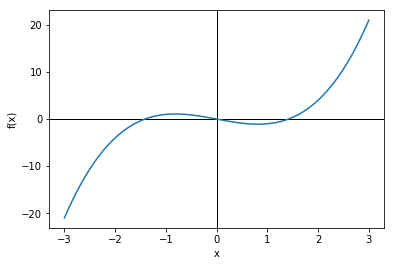

In [33]:
import numpy as np
import matplotlib.pyplot as plt 


def f(x):
    return x**3 - 2*x


x = np.linspace(-3,3, 256, endpoint=True)
y=f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(linewidth=1,color = 'black')
plt.axvline(linewidth=1,color = 'black')
plt.show(plt.plot(x,y)) 

The function does cross y = 0 at $\sqrt{-2}$, $0$ and $\sqrt{2}$ so those are the roots of the polynomial. 

Let's consider modifying the function to be $f(x) = -2x+3$ and find the roots for this equation.

In [34]:
from sympy import roots, solve
x = symbols('x')
f=-2*x +3
solve(f,x)

[3/2]

Plotting the equation indicates that this is the only root at $x=\frac{3}{2}=1.5$: 

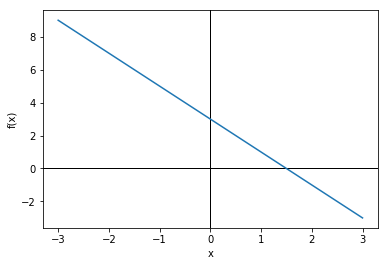

In [35]:
x = np.linspace(-3,3, 256, endpoint=True)

def f(x):
    return -2*x +3

y=f(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(linewidth=1,color = 'black')
plt.axvline(linewidth=1,color = 'black')
plt.show(plt.plot(x,y))


#### References

- [https://sciencedocbox.com/95365341-Physics/Chapter-3-derivatives.html](https://sciencedocbox.com/95365341-Physics/Chapter-3-derivatives.html)

- [https://www.uoguelph.ca/ib/sites/uoguelph.ca.ib/files/public/Ch_3_S%26D%20%281%29_0.pdf](https://www.uoguelph.ca/ib/sites/uoguelph.ca.ib/files/public/Ch_3_S%26D%20%281%29_0.pdf)

- [https://www.amazon.com/Calculus-Language-Change-David-Cohen/dp/0763729477](https://www.amazon.com/Calculus-Language-Change-David-Cohen/dp/0763729477)